# Data Sonification

<img src="img/cover.png">


In [5]:
# https://astronify.readthedocs.io/en/latest/index.html
from astronify.series import SoniSeries
from lightkurve import search_lightcurve
import matplotlib.pyplot as plt

/var/folders/4p/3v7c85y55qdc7jt3wv838n700000gp/T/ipykernel_44136/656944780.py:5: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a future version.
  "KIC 11804465", cadence="long", quarter=1).download_all()[0].SAP_FLUX.to_table()


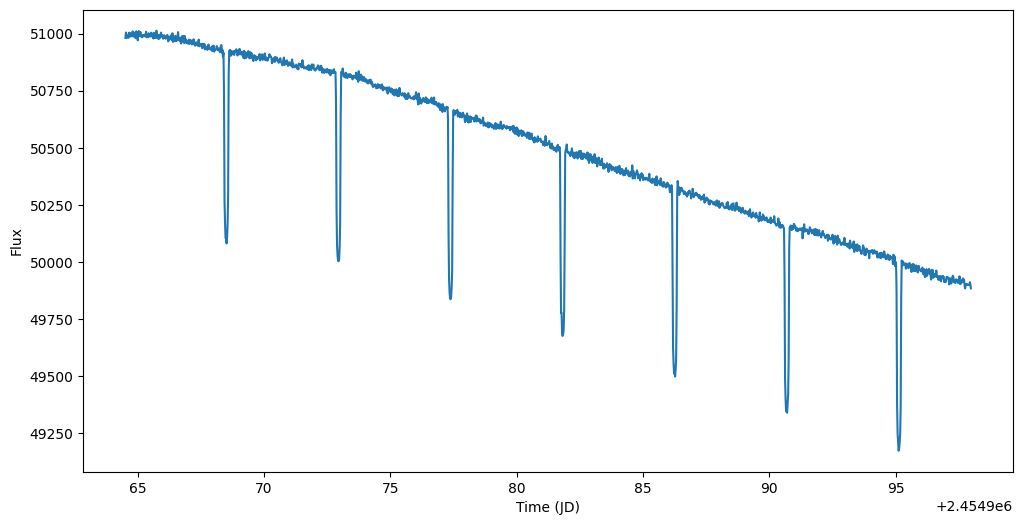

In [7]:
# Download a Kepler light curve for Kepler-12b using lightkurve
# This is a light curve that shows Kepler 12b, a transiting exoplanet

kep12b_lc = search_lightcurve(
    "KIC 11804465", cadence="long", quarter=1).download_all()[0].SAP_FLUX.to_table()
f, ax = plt.subplots(figsize=(12, 6))
ax.plot(kep12b_lc['time'].jd, kep12b_lc['flux'])
ax.set_xlabel("Time (JD)")
ax.set_ylabel("Flux")
plt.show()

### ⚠️ Trigger Alert: This is NOT an alarm! <img src="img/pikud.png">

In [9]:
kep12b_obj = SoniSeries(kep12b_lc)
kep12b_obj.sonify()
kep12b_obj.play()

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


/Users/ofir.n/Projects/data_sonification/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [ ]:
# The playback will stop at the end, but we can also stop it early.
kep12b_obj.stop()

In [10]:
print(kep12b_obj.pitch_mapper.pitch_map_args)

{'pitch_range': [100, 10000], 'center_pitch': 440, 'zero_point': 'median', 'stretch': 'linear'}


In [11]:
kep12b_obj.pitch_mapper.pitch_map_args["center_pitch"] = 880

kep12b_obj.sonify()
kep12b_obj.play()

/Users/ofir.n/Projects/data_sonification/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [ ]:
# kep12b_obj.stop()
# Once the sonification sounds the way we like we can output the result to a wav file.
# kep12b_obj.write("kepler_12b.wav")

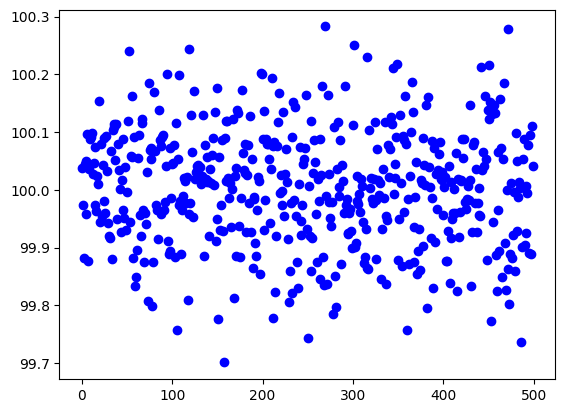

In [12]:
from astronify import simulator, series

lc_data = simulator.simulated_lc(
    "flat", lc_length=500, lc_noise=0.1, visualize=True, lc_yoffset=100.)
soni_obj = series.SoniSeries(lc_data)

In [13]:
soni_obj.sonify()
soni_obj.play()

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


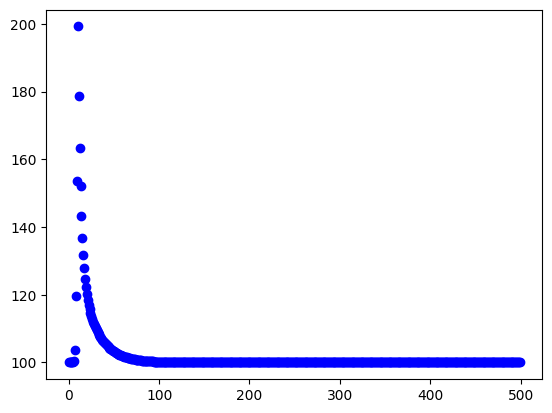

In [14]:
lc_data = simulator.simulated_lc("flare", visualize=True)
soni_obj = series.SoniSeries(lc_data)

In [15]:
soni_obj.sonify()
soni_obj.play()

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


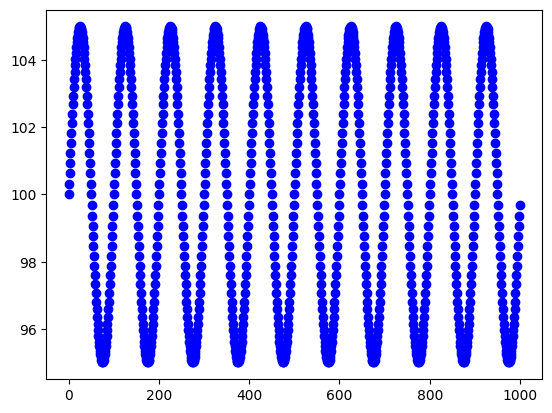

In [20]:
# Now let’s make a sinusoidal signal and use some of the parameter options.
# We will change the amplitude (how “big” the curve is from top to bottom),
# and the period (how long it takes to make one full cycle from peak to bottom and back to peak again).
# We’ll also add a little noise to the light curve, and ask for a light curve that lasts twice as long as the default.

lc_data = simulator.simulated_lc(
    "sine", visualize=True, sine_amp=5, sine_period=100, lc_noise=0, lc_length=1000)
soni_obj = series.SoniSeries(lc_data)

In [21]:
soni_obj.sonify()
soni_obj.play()

Pyo warning: Portaudio input device `MacBook Pro Microphone` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.
